This project is part of Udacity's Nanodegree in Data Science. The focus is to use the Cross-Industry Standard Process for Data Mining (CRISP-DM) process to answer business questions related to Airbnb.

We selected the Bristol, UK dataset, which has information about the hosts, house characteristics, price, and review data left by the guests.

These data were used to estimate income per month, monthly activity variation, income by neighborhood, which features may be related to income and why they are relevant.

The data was taken from:
http://insideairbnb.com/get-the-data.html

The medium post:
https://medium.com/@lucas.pontesm/how-much-one-can-make-with-airbnb-in-bristol-uk-an-exploratory-analysis-52e38ea7fc0b?source=friends_link&sk=994f1b81690d02d2aea7a934b757f665


In [1]:
# Import the necessary libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
%matplotlib inline

read the reviews data and take a look at some of our columns of interest.

In [2]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,70820,8163487,2013-10-18,7538116,Neralee,We loved our stay with Sarah in Bristol. She w...
1,70820,8397676,2013-10-28,9601180,Terry,Sarah gave us and Laddie our dog a very warm w...
2,70820,8706695,2013-11-12,9697980,Alice,Exactly as described on the site and praised b...
3,70820,13024371,2014-05-17,2388955,Thomas,"Sarah was great. She was warm and welcoming, e..."
4,70820,14247963,2014-06-15,16317003,Dimitrije,The experience was really great at Sarah's hou...


In [4]:
reviews.info()
reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94762 entries, 0 to 94761
Data columns (total 6 columns):
listing_id       94762 non-null int64
id               94762 non-null int64
date             94762 non-null object
reviewer_id      94762 non-null int64
reviewer_name    94762 non-null object
comments         94728 non-null object
dtypes: int64(3), object(3)
memory usage: 4.3+ MB


,listing_id,id,reviewer_id
count,9.476200e+04,9.476200e+04,9.476200e+04
mean,1.522235e+07,2.624902e+08,8.429553e+07
std,8.603526e+06,1.331205e+08,7.030312e+07
min,7.082000e+04,3.526710e+05,2.851000e+03
25%,8.248341e+06,1.573042e+08,2.528650e+07
50%,1.601596e+07,2.646797e+08,6.327386e+07
75%,2.123850e+07,3.590899e+08,1.324957e+08
max,3.633967e+07,4.869989e+08,2.743129e+08


read the listing data and summarize the features

In [3]:
listing = pd.read_csv('listings.csv')
print(listing.shape)
listing.head()

(2638, 106)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,70820,https://www.airbnb.com/rooms/70820,20190714024620,2019-07-14,City View - Sarah's double room.,A good sized room with a comfy double bed and ...,The room is in an old Victorian house and has ...,A good sized room with a comfy double bed and ...,none,The neighbourhood is friendly and welcoming; m...,...,f,f,strict_14_with_grace_period,t,f,5,0,5,0,2.02
1,117122,https://www.airbnb.com/rooms/117122,20190714024620,2019-07-14,City Centre-Waterside Retreat,My Harbourside apartment centrally located min...,"A quiet, serene apartment in Bristol city cent...",My Harbourside apartment centrally located min...,none,This area is on the water and has splendid vie...,...,f,f,flexible,f,f,1,0,1,0,1.35
2,146407,https://www.airbnb.com/rooms/146407,20190714024620,2019-07-14,Sunny Central Artist Cottage (Dbl),Large comfortable double room in an artist's h...,• The Large Double room can accommodate 2-4 pe...,Large comfortable double room in an artist's h...,none,• Southville is pretty darn hipster these days...,...,f,f,moderate,f,f,2,0,2,0,0.81
3,176306,https://www.airbnb.com/rooms/176306,20190714024620,2019-07-14,The White Room - Central Bristol Art House Ga...,"A small double room in an artist's house, with...",Private room in a characterful cottage / artis...,"A small double room in an artist's house, with...",none,"Southville is pretty darn hip, frankly. North ...",...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.43
4,220956,https://www.airbnb.com/rooms/220956,20190714024620,2019-07-14,"Light, Modern, 1st Floor Apartment.",My light modern apartment is handily located j...,Please come and stay at my apartment close to ...,My light modern apartment is handily located j...,none,Bedminster is often described as 'up & coming'...,...,f,f,moderate,f,f,1,1,0,0,0.90


In [6]:
listing.info()
listing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638 entries, 0 to 2637
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(23), object(60)
memory usage: 2.1+ MB


,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.638000e+03,2.638000e+03,0.0,0.0,0.0,2.638000e+03,0.0,2638.000000,2638.000000,0.0,...,2243.000000,2245.000000,2243.000000,2243.000000,0.0,2638.000000,2638.000000,2638.000000,2638.000000,2294.000000
mean,2.205722e+07,2.019071e+13,NaN,NaN,NaN,7.768611e+07,NaN,8.557240,8.557240,NaN,...,9.818101,9.830290,9.631743,9.498440,NaN,7.197119,6.111069,1.084534,0.001516,2.067960
std,9.261050e+06,1.293214e+00,NaN,NaN,NaN,7.204847e+07,NaN,25.123879,25.123879,NaN,...,0.582140,0.599443,0.639127,0.741513,NaN,19.333054,19.151497,1.513202,0.038918,2.112208
min,7.082000e+04,2.019071e+13,NaN,NaN,NaN,5.253600e+04,NaN,0.000000,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.020000
25%,1.581520e+07,2.019071e+13,NaN,NaN,NaN,2.064881e+07,NaN,1.000000,1.000000,NaN,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.520000
50%,2.266545e+07,2.019071e+13,NaN,NaN,NaN,5.068129e+07,NaN,2.000000,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,1.350000
75%,2.967575e+07,2.019071e+13,NaN,NaN,NaN,1.256514e+08,NaN,3.000000,3.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,1.000000,1.000000,0.000000,3.000000
max,3.668875e+07,2.019071e+13,NaN,NaN,NaN,2.757551e+08,NaN,679.000000,679.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,86.000000,86.000000,10.000000,1.000000,17.710000


# Data preparation: 
Data preparation was made in two steps:

1st step used to answer what is the income per month, a variação mensal da atividade, income por neighborhood:
- remove columns with more than 60% of missing data
- parse data to float from columns that are presented as string, such as: price, cleaning_fee, deposit_security and extra people 

2nd step, used to answer which features are related to income and why they are relevant. 
for this step a function was build where each decision is discussed. It is an important step to prepare data for future modeling purposes.
It is important to highligh that for this 2nd step the rows with missing month_earn data were droped. For the numerical columns missing data were imputed with the mean values and for dummies variables from categorical data the mode was used to impute missing values.

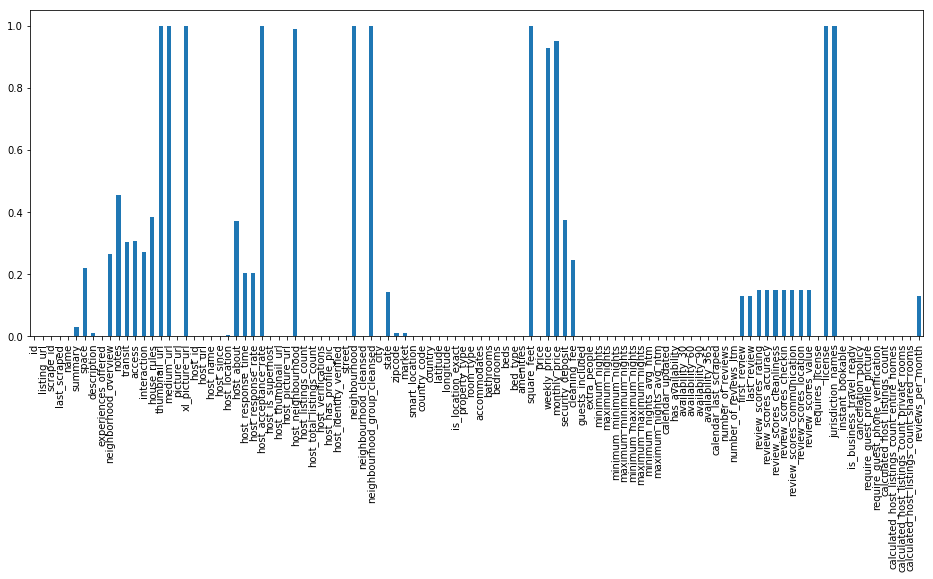

In [7]:
#verify the amount of missing data for each column
listing.isna().mean().plot(kind='bar', figsize = [16,6])

It is possible to observe that there is a few columns with high amount of missing data, i.e., more than 60%. For this reason the 60% threshold was used to remove those columns.

In [8]:
listing.loc[:,listing.isna().mean() <.6].isna().mean().sort_values(ascending = False)

notes                                           0.453753
house_rules                                     0.382866
security_deposit                                0.375284
host_about                                      0.371114
access                                          0.307051
transit                                         0.304018
interaction                                     0.270660
neighborhood_overview                           0.264973
cleaning_fee                                    0.247536
space                                           0.219484
host_response_time                              0.204321
host_response_rate                              0.204321
review_scores_value                             0.149735
review_scores_location                          0.149735
review_scores_checkin                           0.149735
review_scores_communication                     0.148976
review_scores_cleanliness                       0.148976
review_scores_accuracy         

remove columns with more than 60% of missing data

In [4]:
listing_removed = listing.loc[:,listing.isna().mean() <.6]
listing_removed.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,70820,https://www.airbnb.com/rooms/70820,20190714024620,2019-07-14,City View - Sarah's double room.,A good sized room with a comfy double bed and ...,The room is in an old Victorian house and has ...,A good sized room with a comfy double bed and ...,none,The neighbourhood is friendly and welcoming; m...,...,f,f,strict_14_with_grace_period,t,f,5,0,5,0,2.02
1,117122,https://www.airbnb.com/rooms/117122,20190714024620,2019-07-14,City Centre-Waterside Retreat,My Harbourside apartment centrally located min...,"A quiet, serene apartment in Bristol city cent...",My Harbourside apartment centrally located min...,none,This area is on the water and has splendid vie...,...,f,f,flexible,f,f,1,0,1,0,1.35
2,146407,https://www.airbnb.com/rooms/146407,20190714024620,2019-07-14,Sunny Central Artist Cottage (Dbl),Large comfortable double room in an artist's h...,• The Large Double room can accommodate 2-4 pe...,Large comfortable double room in an artist's h...,none,• Southville is pretty darn hipster these days...,...,f,f,moderate,f,f,2,0,2,0,0.81
3,176306,https://www.airbnb.com/rooms/176306,20190714024620,2019-07-14,The White Room - Central Bristol Art House Ga...,"A small double room in an artist's house, with...",Private room in a characterful cottage / artis...,"A small double room in an artist's house, with...",none,"Southville is pretty darn hip, frankly. North ...",...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.43
4,220956,https://www.airbnb.com/rooms/220956,20190714024620,2019-07-14,"Light, Modern, 1st Floor Apartment.",My light modern apartment is handily located j...,Please come and stay at my apartment close to ...,My light modern apartment is handily located j...,none,Bedminster is often described as 'up & coming'...,...,f,f,moderate,f,f,1,1,0,0,0.90


### 1) Estimate income per month

To provide an estimation of the income per month, we need to convert price column to numerical (float).
This parsing procedure was done with the above function

In [5]:
#using a function to parse numerical data
def convert(p):
        try:
            return float(p.strip("$").replace(",",""))
        except:
            try:
                return float(p.strip("%"))
            except:
                return np.nan

The created function was then applied to the price column

In [6]:
listing_removed.loc[:,'price'] = listing_removed['price'].apply(convert)

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Monthly earn was estimated as the product between price, minimum nights and reviews per month

In [7]:
# The montlhy earn, or income per month, was estimated with price, minimum_nights and reviews_per_month
listing_removed.loc[:,'month_earn'] = (listing_removed['price'] * 
                                       listing_removed['minimum_nights'] * 
                                       listing_removed['reviews_per_month'])

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


Lets give a look in month_earn distribution 
A boxplot is an interesting figure that provides the quartiles and outliers 

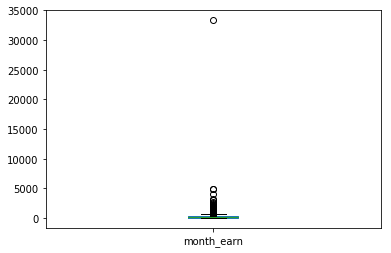

In [8]:
#boxplot of income per month
# Besides the right skewed distribution, it seens that the max value is a outlier
listing_removed['month_earn'].sort_values(ascending = False)
listing_removed['month_earn'].sort_values(ascending = False).plot(kind = 'box')

To understand the outlier we can look for the row correspondent to the max value

In [14]:
# it is probably due to high minimum_nights
listing_removed[listing_removed['month_earn'] == listing_removed['month_earn'].max()][['price', 'reviews_per_month', 'month_earn', 'minimum_nights']]

,price,reviews_per_month,month_earn,minimum_nights
655,100.0,3.7,33300.0,90


A better visualization can be obtained with boxplot of income per month that is less than £10,000.00
the values presented as outliers are due to the right skewed districution of the data, and should be preserved

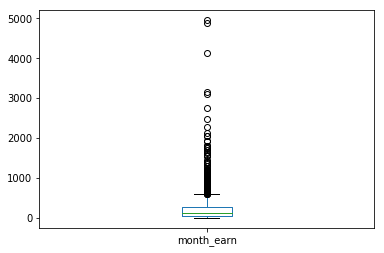

In [15]:
listing_removed[listing_removed['month_earn'] <= 10000]['month_earn'].sort_values(ascending = False).plot(kind = 'box')

The outlier of £ 33000 make it difficult to plot and informative histogram

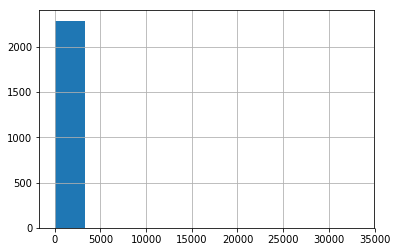

In [16]:
listing_removed['month_earn'].hist()

To better visualize the distribution of income per month data, I've ploted the histogram of month_earn < 1000

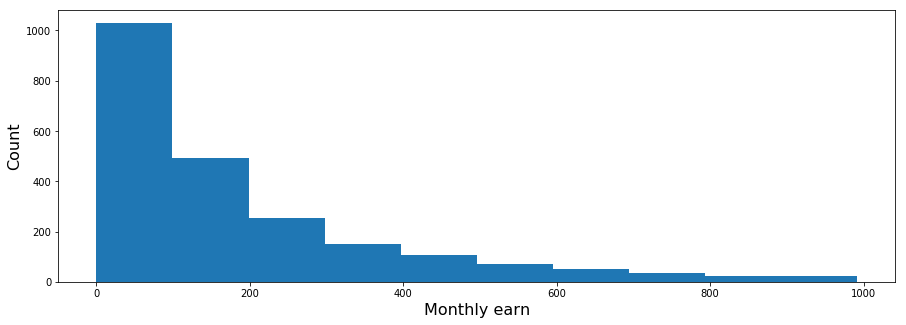

In [9]:
less_than = listing_removed[listing_removed['month_earn'] <= 1000].month_earn
ax = less_than.hist(grid = False, figsize = [15,5])
ax.set_ylabel('Count', size = 16)
ax.set_xlabel('Monthly earn',size = 16)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

### 2) Monthly variation of the Airbnb activity

To evaluate this question the reviews data set was used.
Airbnb activity was inferred from the number of reviews per month

In [10]:
# extract the month from date
reviews['month'] = reviews['date'].apply(lambda d: pd.to_datetime(d).month)

Extract activity by month for each house

In [11]:
rev_mon = ((reviews.groupby(['listing_id', 'month']).count().reset_index()[['listing_id', 'month', 'comments']]).
           join(listing)[['month','comments',  'latitude', 'longitude']])
rev_mon.head()

,month,comments,latitude,longitude
0,1,7,51.43994,-2.59173
1,2,12,51.45051,-2.61054
2,3,6,51.44131,-2.60271
3,4,13,51.44101,-2.60121
4,5,16,51.43852,-2.60142


The bar plot is a good option to visualize the monthly variation of Airbnb activity.

Number of reviews per month was used as an indicator of Airbnb activity

Text(0.5, 0, '')

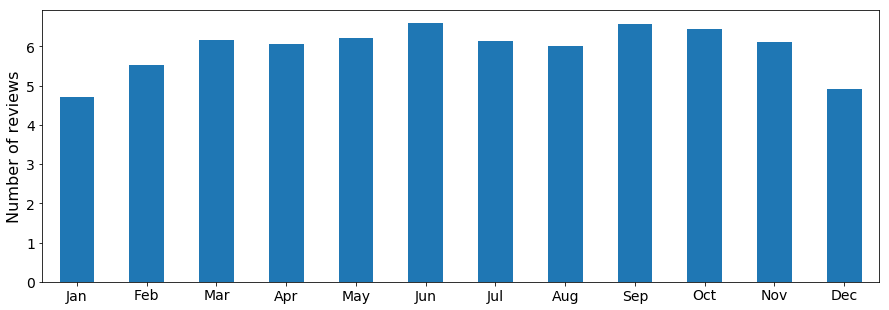

In [12]:
mes = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax = rev_mon.groupby('month').mean().comments.plot(x = mes, kind = 'bar', figsize = [15,5])
for m in ax.set_xticklabels(mes):
    m.set_rotation(0)

ax.set_ylabel("Number of reviews", fontsize = 16)
ax.set_xlabel(None)

Winter season (Dec to Feb) seens to has lower activity

### 3) What is the spatial distribution of the income?

First the price and income per month were summarized for each neighborhood, and then a heatmap was created with folium library.
The heatmap shows the income per month for each given latitude and longitude in listing data

In [24]:
listing_removed.groupby('neighbourhood_cleansed').mean().price

neighbourhood_cleansed
Ashley                          81.993921
Avonmouth & Lawrence Weston     59.953846
Bedminster                      59.237288
Bishopston & Ashley Down        66.095238
Bishopsworth                    41.809524
Brislington East               117.173913
Brislington West                56.414634
Central                        108.313208
Clifton                         89.295699
Clifton Down                    87.525316
Cotham                          78.875000
Easton                          55.134921
Eastville                       60.930556
Filwood                         45.250000
Frome Vale                      59.080000
Hartcliffe & Withywood          38.200000
Henbury & Brentry               69.571429
Hengrove & Whitchurch Park      41.714286
Hillfields                      53.344828
Horfield                        62.170732
Hotwells & Harbourside          92.703297
Knowle                          54.771429
Lawrence Hill                   61.503106
Lockleaze  

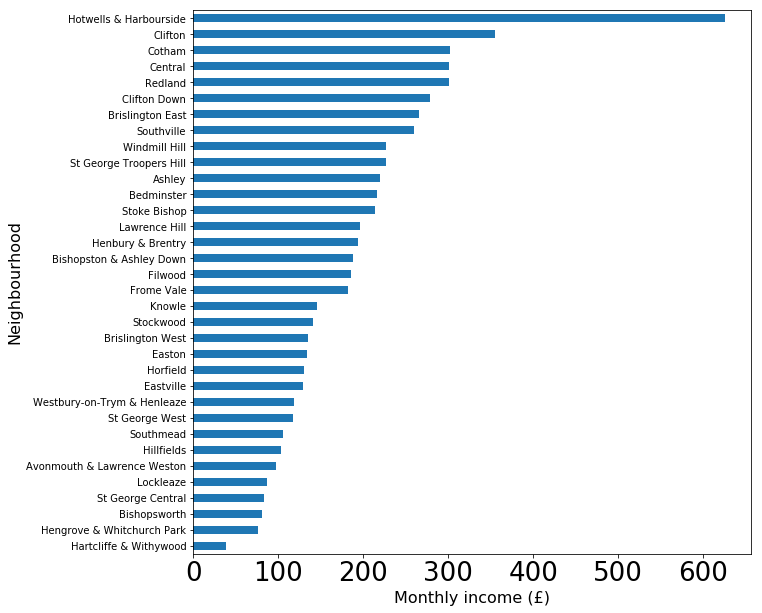

In [20]:
sorted_income = listing_removed.groupby('neighbourhood_cleansed').mean().sort_values('month_earn').month_earn
ax = sorted_income.plot.barh(figsize = [10,10])
ax.set_xlabel("Monthly income (\xA3)", fontsize = 16)
ax.set_ylabel("Neighbourhood", fontsize = 16)
plt.savefig('earn_neighb')

In the cell below are presented the sorted values of income per month by neighborhood

In [37]:
sorted_income

neighbourhood_cleansed
Hartcliffe & Withywood          38.236000
Hengrove & Whitchurch Park      76.292143
Bishopsworth                    80.463889
St George Central               82.668261
Lockleaze                       86.584000
Avonmouth & Lawrence Weston     97.680179
Hillfields                     103.760000
Southmead                      105.032500
St George West                 117.367805
Westbury-on-Trym & Henleaze    118.204898
Eastville                      128.668254
Horfield                       129.855152
Easton                         133.596789
Brislington West               134.911081
Stockwood                      141.077500
Knowle                         145.603333
Frome Vale                     181.591905
Filwood                        185.337500
Bishopston & Ashley Down       187.387174
Henbury & Brentry              194.333636
Lawrence Hill                  195.936643
Stoke Bishop                   213.819310
Bedminster                     215.754364
Ashley     

We can clearly see that Hotwells & Harbourside neighborhood has the higher income. It looks like this higher income is due a high price and good activity.

In [13]:
Map = folium.Map(location = [51.44, -2.58], zoom_start = 12)
droped = listing_removed.dropna(subset=['latitude', 'longitude', 'month_earn'])
HeatMap(data=droped[['latitude', 'longitude', 'month_earn']].groupby(['latitude', 'longitude']).mean().reset_index().values.tolist(), radius=8, max_zoom=13,min_opacity = .1 ).add_to(Map)
Map

### 3) What features are related to income per month (feature selection)?

Another relevant question to hosts to provide better services and increase their income is to understand what features determine the monthly earn.
To address this question with an exploratory analysis, i.e. without modeling, we can calculate the Pearson correlation between the features and income.
For that a deep data cleaning was done using a function that clean the data and provide normalized and scaled data, which is an important task for data pipelin preparation for machine learning.

In [260]:
# to look for all features available in the original data set
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximu

In [14]:
#function used to clean and process the data
#create dummy variables to te categorical features
#normalize and scale the data in order to be used on modeling

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop columns with more than 60% of missing data
    2. Convert some string features to float (price, cleaning_fee, security_deposit,extra_people)
    3. Replace f and t characters with 0 and 1.
    4. Extract each amenitie item available for each host
    5. Select features that seens to be related with income per month (var_num and var_cat)
    6. Impute numerical missing values with the mean
    7. Scale and normalize numerical data
    8. Create dummy variables for the selected categorical variables  
    9. Drop all the rows with no price
    10. Create X as all the columns that are not the month_earn column
    11. Create y as the month_earn column
    '''
    
    def convert(p):
        try:
            return float(p.strip("$").replace(",",""))
        except:
            try:
                return int(p.strip("%"))
            except:
                return np.nan
            
    listing_removed = df.loc[:,df.isna().mean() <.6]
    listing_removed.loc[:,'price'] = listing_removed['price'].apply(convert)
    listing_removed.loc[:,'cleaning_fee'] = listing_removed['cleaning_fee'].apply(convert)
    listing_removed.loc[:,'security_deposit'] = listing_removed['security_deposit'].apply(convert)
    listing_removed.loc[:,'extra_people'] = listing_removed['extra_people'].apply(convert)
    listing_removed['host_is_superhost'].replace(['f','t'],[0,1],inplace=True)
    listing_removed.loc[:,'month_earn'] = listing_removed['price'] * listing_removed['minimum_nights'] * listing_removed['reviews_per_month']
    
    listing_removed.loc[:,'amenities'] = listing_removed['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")]))
    amenities = np.unique(np.concatenate(listing_removed['amenities'].map(lambda amns: amns.split("|"))))[1:]
    amenity_arr = np.array([listing_removed['amenities'].map(lambda amns: amn in amns) for amn in amenities])
    
    var_num = ['bathrooms', 'bedrooms', 'beds','extra_people', 'cleaning_fee','minimum_nights',
               'maximum_nights', 'review_scores_rating', 'review_scores_accuracy',
               'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
               'review_scores_location', 'review_scores_value','security_deposit']
    
    var_cat = ['neighbourhood_cleansed','property_type','room_type','accommodates','bed_type', 
            'guests_included','cancellation_policy']
    
    #fill na with mean values for numeric columns
    num_feat_fill = listing_removed[var_num].fillna(listing_removed[var_num].mean())
    cat_feat_fill = listing_removed[var_cat].fillna(listing_removed[var_cat].mode())
    
    #normalize
    num_log_transformed = num_feat_fill.apply(lambda x: np.log(x + 1))
       
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler() 
    num_log_minmax_transform = scaler.fit_transform(num_log_transformed)
    
    features = pd.concat([listing_removed['month_earn'],
                          listing_removed['host_is_superhost'],
                          pd.DataFrame(num_log_minmax_transform, columns=var_num),
                          pd.get_dummies(cat_feat_fill),
                          pd.DataFrame(data=amenity_arr.T, columns=amenities)],
                         axis=1)
    
    # drop rows without month_earn and categorical data 
    features.dropna(inplace=True)
    
    y = features.month_earn
    X = features.drop(columns = ["month_earn"])
    
    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(listing)
X.drop(columns = ['translation missing: en.hosting_amenity_50','translation missing: en.hosting_amenity_49' ], inplace=True)
#remove colunms wuth non relevant data
X.drop(columns = ['property_type_Boutique hotel','property_type_Earth house','property_type_Castle','property_type_Aparthotel',
                  'cancellation_policy_super_strict_60'], inplace = True)

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


With the cleaned, normalized and scaled data it was calculated the correlation of each feature with the month_earn.

To better understand this correlation I've ploted correlation values as horizontal bars.

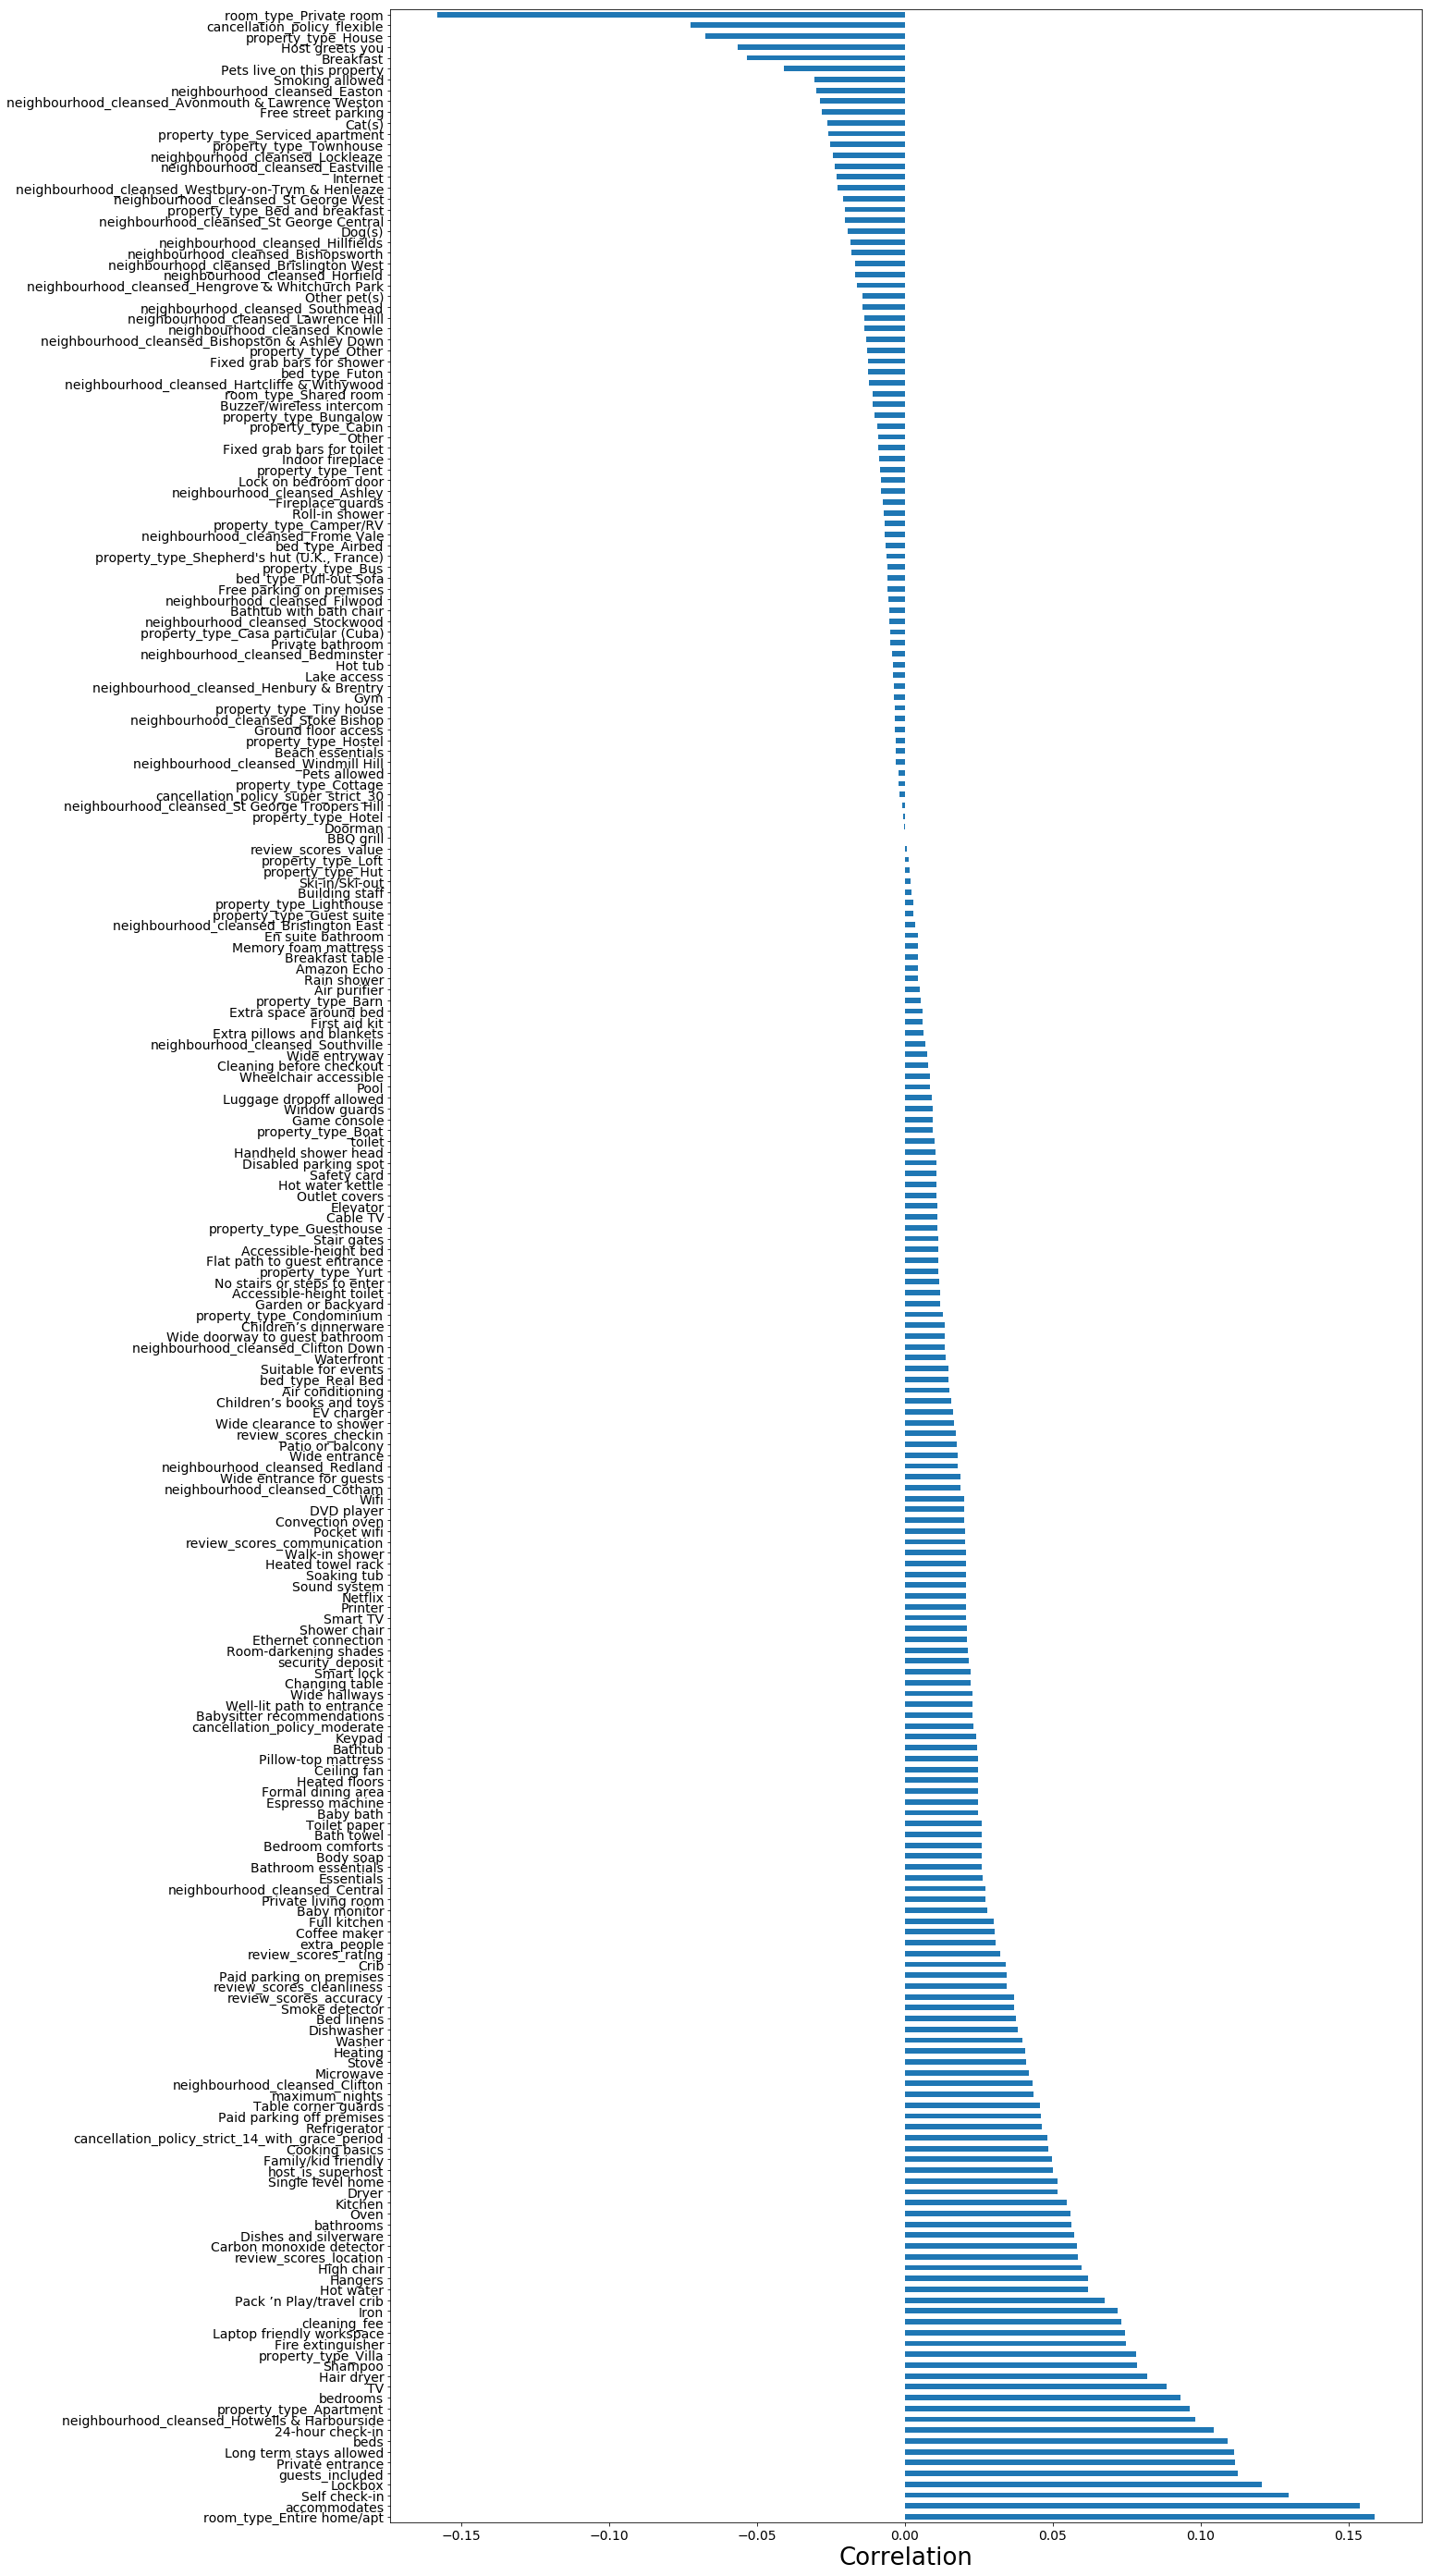

In [19]:
#Plot the correlation as horizontal bar
plt.rcParams['figure.figsize'] = (20, 50)
correlat = (pd.concat([X,y], axis = 1).corr()['month_earn'].
            sort_values(ascending = False).drop(['month_earn', 'minimum_nights']))
ax = correlat.plot.barh()
ax.set_xlabel('Correlation', size= 26)
plt.rc('xtick', labelsize=26) 
plt.savefig('correlation.png')

The correlation values for each feature were used to select the features that can explain better the income per month

In [24]:
#sorted correlation values 
(pd.concat([X,y], axis = 1).corr()['month_earn'].
 sort_values(ascending = False).drop(['month_earn', 'minimum_nights']))

room_type_Entire home/apt                             0.158916
accommodates                                          0.153859
Self check-in                                         0.129618
Lockbox                                               0.120712
guests_included                                       0.112538
Private entrance                                      0.111493
Long term stays allowed                               0.111259
beds                                                  0.109097
24-hour check-in                                      0.104372
neighbourhood_cleansed_Hotwells & Harbourside         0.098195
property_type_Apartment                               0.096310
bedrooms                                              0.093160
TV                                                    0.088575
Hair dryer                                            0.081792
Shampoo                                               0.078345
property_type_Villa                                   0

Based on correlation values the following characteristics were selected for a closer analysis

In [21]:
feat_cor = pd.concat([y,X[['Pets live on this property','Breakfast',
                           'Host greets you','property_type_House','cancellation_policy_flexible','room_type_Private room',
                           'room_type_Entire home/apt','accommodates','Self check-in','Lockbox','guests_included',
                           'Private entrance','Long term stays allowed','24-hour check-in','cleaning_fee',
                           'neighbourhood_cleansed_Hotwells & Harbourside','property_type_Apartment','beds','TV',
                           'Hair dryer']]],axis = 1)

Finally, the selected features are than used to plot a correlation matrix heatmap

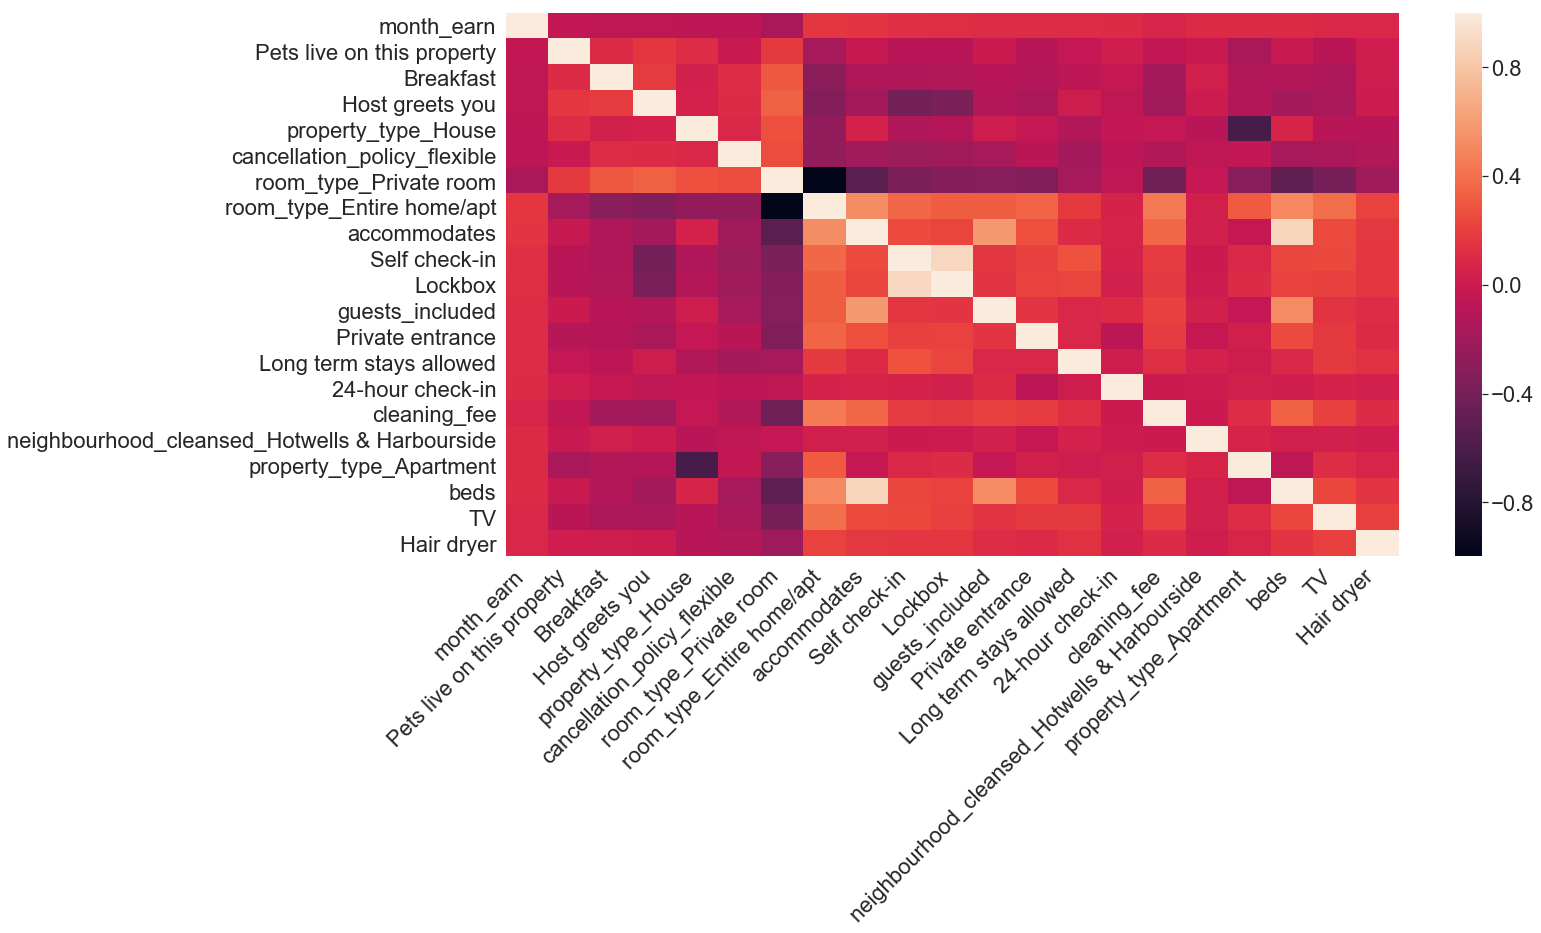

In [22]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(font_scale=2)
ax = sns.heatmap(feat_cor.corr())
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Results evaluation:
It was provided a conservative estimative of income per month based on price, reviews per month and minimum nights.
The average income per month in Bristol is £ 236.58, and range between £ 38.23 for Hartcliffe & Withywood neighborhood £ 625.55 for Hotwells & Harbourside.
Airbnb has two rental modes: Entire home and private room. This seens to be the main feature related to the income per month, i.e. entire home rents provides higher income than private room. 
Other features with positive correlations include: accommodates, Self-check-in, Lockbox, guests_included, Private entrance, Long term stays allowed, 24-hour check-in, cleaning_fee, beds, TV, Hairdryer among others with lower positive correlation.
On the other hand, the main features with negative correlation, i.e. positive or high values indicate lower income are: cancellation_policy_flexible, property_type_House, Host greets you, Breakfast, Pets live on this property. However, all these shows weak correlation with income.
With this results we gained confidence to model income per month with machine learning algorithms, that is a subject for a future project.